# Pré-processamento de dados do Dataset 
Aplicando técnicas de pré-processamento ao dataset "enhanced student habits performance" disponível em https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset/data

Importando bibliotecas e lendo o dataset

In [59]:
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt

df=pd.read_csv("enhanced_student_habits_performance_dataset.csv")
df.head(8)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,110197,17,Female,Engineering,3.300000,2.9,2.0,No,97.6,7.9,...,9.2,Cafe,No,High,7.0,2.0,10.0,Auditory,10.0,87.0
1,110198,24,Female,Arts,0.500000,1.8,0.4,Yes,77.6,6.5,...,4.0,Quiet Room,No,High,1.0,2.0,10.0,Auditory,4.0,87.0
2,110199,26,Other,Computer Science,5.086285,1.1,3.7,Yes,97.9,7.5,...,10.1,Library,Yes,Medium,4.0,7.0,8.0,Auditory,2.4,97.0
3,110200,24,Male,Psychology,7.000000,0.9,2.8,No,42.0,7.8,...,11.9,Dorm,Yes,High,9.0,6.0,9.0,Visual,9.7,96.0
4,110201,19,Female,Engineering,2.500000,4.3,1.5,No,73.1,8.4,...,9.9,Dorm,Yes,Low,6.0,2.0,10.0,Visual,3.5,76.0
5,110202,21,Other,Biology,5.200000,1.4,0.7,No,71.1,6.1,...,7.3,Cafe,Yes,Low,8.0,8.0,7.0,Reading,6.5,92.0
6,110203,26,Other,Arts,1.500000,3.3,4.0,Yes,77.7,7.2,...,10.6,Library,Yes,High,10.0,5.0,10.0,Kinesthetic,5.2,84.0
7,110204,19,Female,Biology,6.500000,3.6,2.0,No,82.0,11.0,...,14.0,Co-Learning Group,No,High,7.0,3.0,10.0,Kinesthetic,6.6,96.0


Verificando se existem colunas com valores faltantes

In [60]:
valores_faltantes=df.isnull().sum()

valores_faltantes=valores_faltantes[valores_faltantes>0]
if valores_faltantes.empty:
    print("Não foram encontrados valores faltantes.")
else:
    print("Colunas com valores faltantes:\n",valores_faltantes)

Colunas com valores faltantes:
 parental_education_level    4596
parental_support_level         1
motivation_level               1
exam_anxiety_score             1
learning_style                 2
time_management_score          2
exam_score                     2
dtype: int64


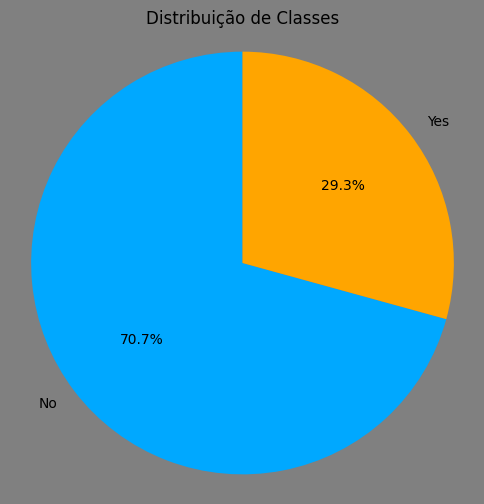

In [61]:
#plotando Distribuição de Classes
count = df['dropout_risk'].value_counts()

fig, ax = plt.subplots(figsize=(6,6), facecolor='grey')
colors = ['#00A8FF', '#FFA500'] 
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribuição de Classes')
plt.axis('equal')
plt.show()


# Amostragem de dados

In [62]:
# Aleatória com 20% dos dados
#df_sample = df.sample(frac=0.2, random_state=42)
#df_sample

Verificando os tipos de dados de cada coluna

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96767 entries, 0 to 96766
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     96767 non-null  int64  
 1   age                            96767 non-null  int64  
 2   gender                         96767 non-null  object 
 3   major                          96767 non-null  object 
 4   study_hours_per_day            96767 non-null  float64
 5   social_media_hours             96767 non-null  float64
 6   netflix_hours                  96767 non-null  float64
 7   part_time_job                  96767 non-null  object 
 8   attendance_percentage          96767 non-null  float64
 9   sleep_hours                    96767 non-null  float64
 10  diet_quality                   96767 non-null  object 
 11  exercise_frequency             96767 non-null  int64  
 12  parental_education_level       92171 non-null 

# Limpeza de Dados

In [64]:
# Descarta linhas que tiverem pelo menos uma coluna vazia ou com o valor NaN

df = df.dropna()
df.head(8)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,110197,17,Female,Engineering,3.300000,2.9,2.0,No,97.6,7.9,...,9.2,Cafe,No,High,7.0,2.0,10.0,Auditory,10.0,87.0
1,110198,24,Female,Arts,0.500000,1.8,0.4,Yes,77.6,6.5,...,4.0,Quiet Room,No,High,1.0,2.0,10.0,Auditory,4.0,87.0
2,110199,26,Other,Computer Science,5.086285,1.1,3.7,Yes,97.9,7.5,...,10.1,Library,Yes,Medium,4.0,7.0,8.0,Auditory,2.4,97.0
3,110200,24,Male,Psychology,7.000000,0.9,2.8,No,42.0,7.8,...,11.9,Dorm,Yes,High,9.0,6.0,9.0,Visual,9.7,96.0
4,110201,19,Female,Engineering,2.500000,4.3,1.5,No,73.1,8.4,...,9.9,Dorm,Yes,Low,6.0,2.0,10.0,Visual,3.5,76.0
5,110202,21,Other,Biology,5.200000,1.4,0.7,No,71.1,6.1,...,7.3,Cafe,Yes,Low,8.0,8.0,7.0,Reading,6.5,92.0
6,110203,26,Other,Arts,1.500000,3.3,4.0,Yes,77.7,7.2,...,10.6,Library,Yes,High,10.0,5.0,10.0,Kinesthetic,5.2,84.0
7,110204,19,Female,Biology,6.500000,3.6,2.0,No,82.0,11.0,...,14.0,Co-Learning Group,No,High,7.0,3.0,10.0,Kinesthetic,6.6,96.0


# Eliminação de Atributos

In [65]:
#Para a retirada de atributos, é só acrescentar os atributos os nomes dos atributos em aspas simples, como o 'student_id'

df_sem_atributos = df.drop(columns=['student_id', 'social_media_hours', 'netflix_hours','parental_support_level','learning_style','time_management_score','internet_quality','part_time_job','study_environment'])
display(df_sem_atributos.head(8))

print("Número de colunas:", df_sem_atributos.shape[1])

,age,gender,major,study_hours_per_day,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,mental_health_rating,...,semester,stress_level,dropout_risk,social_activity,screen_time,access_to_tutoring,family_income_range,motivation_level,exam_anxiety_score,exam_score
0,17,Female,Engineering,3.300000,97.6,7.9,Fair,0,Bachelor,2.6,...,4,8.8,Yes,4.0,9.2,No,High,2.0,10.0,87.0
1,24,Female,Arts,0.500000,77.6,6.5,Fair,6,Master,3.1,...,8,2.4,No,3.0,4.0,No,High,2.0,10.0,87.0
2,26,Other,Computer Science,5.086285,97.9,7.5,Good,7,PhD,3.6,...,5,8.3,No,0.0,10.1,Yes,Medium,7.0,8.0,97.0
3,24,Male,Psychology,7.000000,42.0,7.8,Fair,7,Master,6.7,...,7,4.4,No,5.0,11.9,Yes,High,6.0,9.0,96.0
4,19,Female,Engineering,2.500000,73.1,8.4,Good,4,PhD,6.8,...,1,5.7,No,1.0,9.9,Yes,Low,2.0,10.0,76.0
5,21,Other,Biology,5.200000,71.1,6.1,Fair,4,High School,2.8,...,1,7.2,No,3.0,7.3,Yes,Low,8.0,7.0,92.0
6,26,Other,Arts,1.500000,77.7,7.2,Good,1,Master,5.2,...,5,3.5,No,4.0,10.6,Yes,High,5.0,10.0,84.0
7,19,Female,Biology,6.500000,82.0,11.0,Good,1,High School,8.1,...,2,3.6,No,3.0,14.0,No,High,3.0,10.0,96.0


Número de colunas: 22


Não rodar este bloco por enquanto. Ideias futuras

In [66]:
"""
#Mesclando os dados de estresse e ansiedade, fazendo uma média e colocando em uma nova coluna 'stress_exam_combined'
df["stress_exam_combined"] = (df["stress_level"] + df["exam_anxiety_score"]) / 2

#Retirando os atributos 'stress_level' e 'exam_anxiety_score' para deixar apenas a nova coluna 'stress_exam_combined'
df_sem_atributos = df.drop(columns=['stress_level', 'exam_anxiety_score'])
print(df[[ "stress_level", "exam_anxiety_score", "stress_exam_combined"]].head())
df_sem_atributos.head(8)
"""

'\n#Mesclando os dados de estresse e ansiedade, fazendo uma média e colocando em uma nova coluna \'stress_exam_combined\'\ndf["stress_exam_combined"] = (df["stress_level"] + df["exam_anxiety_score"]) / 2\n\n#Retirando os atributos \'stress_level\' e \'exam_anxiety_score\' para deixar apenas a nova coluna \'stress_exam_combined\'\ndf_sem_atributos = df.drop(columns=[\'stress_level\', \'exam_anxiety_score\'])\nprint(df[[ "stress_level", "exam_anxiety_score", "stress_exam_combined"]].head())\ndf_sem_atributos.head(8)\n'

# Transformação de Dados
Para esta fase, é selecionado todos atributos que tem valor não numérico e convertido, após isso é realizado a normalização de todos eles

In [67]:
print("Tipos de dados antes da transformação: ")
print(df_sem_atributos.dtypes)

nao_numericos = df_sem_atributos.select_dtypes(include='object').columns.to_list()
numericos = df_sem_atributos.select_dtypes(include=['int64','float64'])

print(f"Conlunas não numéricas: {nao_numericos}")
print(f"Conlunas numéricas: {list(numericos)}")

Tipos de dados antes da transformação: 
age                                int64
gender                            object
major                             object
study_hours_per_day              float64
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
mental_health_rating             float64
extracurricular_participation     object
previous_gpa                     float64
semester                           int64
stress_level                     float64
dropout_risk                      object
social_activity                  float64
screen_time                      float64
access_to_tutoring                object
family_income_range               object
motivation_level                 float64
exam_anxiety_score               float64
exam_score                       float64
dtype: object
Conlunas não numéricas: ['gender', 'major', 

In [68]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Codificação categórica ordinal
ordinal_encoder = OrdinalEncoder()
encoded = ordinal_encoder.fit_transform(df_sem_atributos[nao_numericos])

df_nao_numericos = pd.DataFrame(encoded,
                                columns=nao_numericos,
                                index=df_sem_atributos.index)

df_label = df_sem_atributos['dropout_risk']
df_separado = df_sem_atributos.drop(columns=['dropout_risk'] + nao_numericos)

df_pre_processado = pd.concat([df_separado, df_nao_numericos],axis=1)
display(df_pre_processado)


,age,study_hours_per_day,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,stress_level,social_activity,...,exam_anxiety_score,exam_score,gender,major,diet_quality,parental_education_level,extracurricular_participation,dropout_risk,access_to_tutoring,family_income_range
0,17,3.300000,97.600000,7.900000,0,2.600000,3.430000,4,8.800000,4.0,...,10.000000,87.000000,0.0,6.0,2.0,0.0,1.0,1.0,0.0,0.0
1,24,0.500000,77.600000,6.500000,6,3.100000,3.520000,8,2.400000,3.0,...,10.000000,87.000000,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0
2,26,5.086285,97.900000,7.500000,7,3.600000,3.600000,5,8.300000,0.0,...,8.000000,97.000000,2.0,3.0,3.0,5.0,1.0,0.0,1.0,3.0
3,24,7.000000,42.000000,7.800000,7,6.700000,3.940000,7,4.400000,5.0,...,9.000000,96.000000,1.0,10.0,2.0,3.0,1.0,0.0,1.0,0.0
4,19,2.500000,73.100000,8.400000,4,6.800000,2.910000,1,5.700000,1.0,...,10.000000,76.000000,0.0,6.0,3.0,5.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96761,28,0.702556,88.398542,7.220186,6,4.421723,1.123240,2,5.716620,7.0,...,5.319910,51.441001,0.0,9.0,4.0,5.0,1.0,1.0,1.0,0.0
96763,19,5.309346,54.885070,4.686597,5,3.587029,1.870105,7,6.565995,1.0,...,2.358127,74.199274,0.0,7.0,0.0,2.0,1.0,1.0,1.0,0.0
96764,23,5.400236,79.954647,6.977531,1,1.614561,1.296751,2,9.141313,0.0,...,1.205754,73.212803,0.0,6.0,0.0,5.0,0.0,1.0,0.0,0.0
96765,19,7.158733,60.668502,7.436312,2,6.365668,2.665971,1,6.123851,5.0,...,4.393213,54.685937,1.0,1.0,3.0,0.0,1.0,1.0,1.0,0.0


In [69]:
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split

#Decision Trees
def decision_tree(X_train, y_train,X_test,y_test):
    #Treinando o modelo
    tree_clf = tree.DecisionTreeClassifier(random_state=42)

    #Decidindo os hiperparâmentros
    parameters = { 
        'criterion': ['gini', 'entropy'], 
        'max_depth': [None, 5, 10, 20], #profundidade máx da árvore
        'min_samples_split': [2, 5, 10], #mínimo de amostras para dividir um nó interno
        'min_samples_leaf': [1, 2, 4] #mínimo de amostras por nó folha
    }
    clf = GridSearchCV(estimator = tree_clf, param_grid = parameters, cv = 5, scoring='accuracy')

    clf.fit(X_train,y_train) #treina com todas as combinações
    best_tree = clf.best_estimator_ #escolhe o com melhor desempenho

    #Avaliando o modelo
    tree_pred = best_tree.predict(X_test)
    accuracy = accuracy_score(y_test, tree_pred)
    f1 = f1_score(y_test,tree_pred, average='weighted')
    print("Melhores hiperparâmetros:", clf.best_params_)
    print("Accuracy:", accuracy, "f1:",f1)

    return accuracy,f1

#plt.figure(figsize=(20,10))
#tree.plot_tree(best_tree, max_depth=2, feature_names=vectorizer.get_feature_names_out(), class_names=label_enconder.classes_, filled=True)
#plt.show()
# max_depth profundidade da árvore
# filled=True colore os nós de acordo com a classe predominante
# feature_names mostra quais palavras sao mais importantes para as decisoes

In [70]:
X = df_pre_processado.drop(columns=["dropout_risk"])

y = df_pre_processado["dropout_risk"] # Rótulos ham ou spam
label_enconder = LabelEncoder()
y_enconder = label_enconder.fit_transform(y) #transforma o label em número: 0->ham 1->spam

# Configuração do kfold
skf = StratifiedKFold(n_splits=10)

# Armazenar métricas
accuracy_scores = []
f1_scores = []

for i,(train_index, test_index) in enumerate(skf.split(X,y_enconder)):
    X_train_fold = X.iloc[train_index]
    X_test_fold = X.iloc[test_index]
    y_train_fold = [y_enconder[i] for i in train_index]
    y_test_fold = [y_enconder[i] for i in test_index]

    print("_____________________________________________________")
    print(f"Fold {i+1}:")
    accuracy, f1 = decision_tree(X_train_fold,y_train_fold,X_test_fold,y_test_fold)

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Resultados finais
print("_____________________________________________________")
print(f"Acurácia: {accuracy_scores}")
print(f"F1-score: {f1_scores}")


_____________________________________________________
Fold 1:
Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.9087555603775632 f1: 0.9019098640301254
_____________________________________________________
Fold 2:


KeyboardInterrupt: 